In [36]:
import pandas as pd
df_red = pd.read_csv('winequality-red.csv', delimiter=';')
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


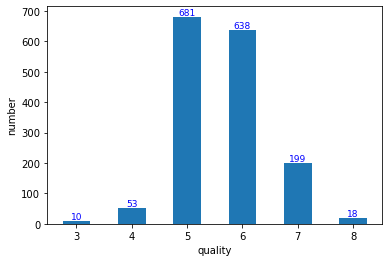

In [38]:
import matplotlib.pyplot as plt
y_axis = [0,0,0,0,0,0]
x_range = range(3,9)
for i in range(len(df_red['quality'])):
    if df_red['quality'][i] == 3:
        y_axis[0] += 1
    elif df_red['quality'][i] == 4:
        y_axis[1] += 1
    elif df_red['quality'][i] == 5:
        y_axis[2] += 1
    elif df_red['quality'][i] == 6:
        y_axis[3] += 1
    elif df_red['quality'][i] == 7:
        y_axis[4] += 1
    elif df_red['quality'][i] == 8:
        y_axis[5] += 1
    else:
        break

plt.bar(x_range, y_axis, width = 0.5)
for i, v in enumerate(x_range):
    plt.text(v, y_axis[i], y_axis[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.xlabel('quality')
plt.ylabel('number')
plt.show()


In [39]:
# information
df_red['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [10]:
import numpy as np
quality_statistic = [0,0,0,0,0,0,0,0] # count, mean, std, min, q1, q2, q3, max 순서
name = ['count', 'mean', 'std', 'min', 'q1', 'q2', 'q3', 'max']
quality_statistic[0] = len(df_red['quality'])
quality_statistic[1] = np.mean(df_red['quality'])
quality_statistic[2] = np.std(df_red['quality'])
quality_statistic[3] = df_red['quality'].quantile(0)
quality_statistic[4] = df_red['quality'].quantile(.25)
quality_statistic[5] = df_red['quality'].quantile(.5)
quality_statistic[6] = df_red['quality'].quantile(.75)
quality_statistic[7] = df_red['quality'].quantile(1)
for i in range(len(quality_statistic)):
    print(name[i] + ':', quality_statistic[i])

count: 1599
mean: 5.6360225140712945
std: 0.8073168769639486
min: 3.0
q1: 5.0
q2: 6.0
q3: 6.0
max: 8.0


<function matplotlib.pyplot.show(close=None, block=None)>

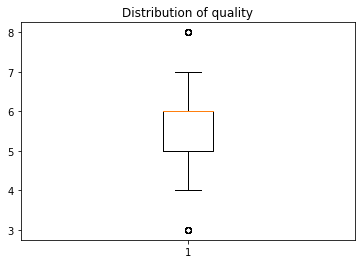

In [40]:
plt.boxplot(df_red['quality'])
plt.title('Distribution of quality')
plt.show

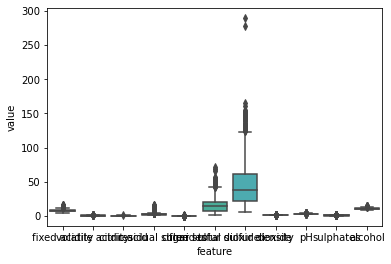

<Figure size 864x216 with 0 Axes>

In [42]:
# 각 feature 분포 boxplot
import seaborn as sns

data = []
section = ['fixed acidity']*1599+['volatile acidity']*1599+['citric acid']*1599+['residual sugar']*1599+['chlorides']*1599+['free sulfur dioxide']*1599+['total sulfur dioxide']*1599+['density']*1599+['pH']*1599+['sulphates']*1599+['alcohol']*1599
for i in range(11):
    for j in range(1599):
        data.append(df_red.iloc[j,i])
aa = pd.DataFrame(data)
aa.insert(0,'section',section)
aa.columns = ['feature','value']
sns.boxplot(x="feature",y="value",data=aa)
plt.figure(figsize=(12,3))
plt.show()



In [44]:
# min-max normalization 
from sklearn.preprocessing import MinMaxScaler
df_normalized = df_red[:]
scaler = MinMaxScaler()
df_normalized[:] = scaler.fit_transform(df_normalized[:])
df_normalized['quality'] = df_red['quality']
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


In [14]:
'''
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

x_data = df_red[['volatile acidity',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',      'pH', 'sulphates', 'alcohol']]
target = df_red[['quality']]
ridge = Ridge().fit(x_data, target)
y_pred = ridge.predict(x_data)
r2 = r2_score(df_red['quality'],y_pred)
r2
'''

"\nfrom sklearn.linear_model import Ridge\nfrom sklearn.metrics import r2_score\n\nx_data = df_red[['volatile acidity',\n       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',      'pH', 'sulphates', 'alcohol']]\ntarget = df_red[['quality']]\nridge = Ridge().fit(x_data, target)\ny_pred = ridge.predict(x_data)\nr2 = r2_score(df_red['quality'],y_pred)\nr2\n"

In [48]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

x_data = df_red.drop(['quality'], axis=1)
target = df_red[['quality']]
clf =svm.SVC(kernel = 'rbf')
clf = clf.fit(x_data, target)
y_pred = clf.predict(x_data)
r2 = mt.r2_score(df_red['quality'],y_pred)
r2

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.3024137943450099

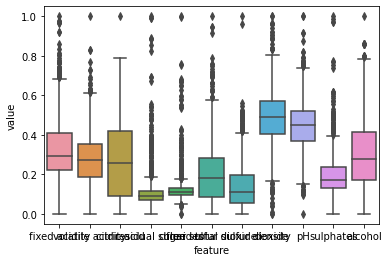

<Figure size 864x216 with 0 Axes>

In [50]:
data = []
section = ['fixed acidity']*1599+['volatile acidity']*1599+['citric acid']*1599+['residual sugar']*1599+['chlorides']*1599+['free sulfur dioxide']*1599+['total sulfur dioxide']*1599+['density']*1599+['pH']*1599+['sulphates']*1599+['alcohol']*1599
for i in range(11):
    for j in range(1599):
        data.append(df_red.iloc[j,i])
aa = pd.DataFrame(data)
aa.insert(0,'section',section)
aa.columns = ['feature','value']
sns.boxplot(x="feature",y="value",data=aa)
plt.figure(figsize=(12,3))
plt.show()

In [51]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [52]:
# check high correlated feature
for i in range(12):
    for j in range(12):
        if 0.5 < abs(corr.iloc[i,j]) < 1:
            print(corr.iloc[i,j])

0.6717034347641069
0.6680472921189745
-0.6829781945685308
-0.5524956845595821
0.6717034347641069
-0.5524956845595821
-0.5419041447395104
0.6676664504810209
0.6676664504810209
0.6680472921189745
-0.6829781945685308
-0.5419041447395104


In [53]:
# high correlated
'''
1. fixed acidity & citric acid : 0.6717034347641084
2. fixed acidity & density : 0.6680472921189742
3. fixed acidity & pH : -0.6829781945685356
4. volatile acidity & citric acid : -0.552495684559583
5. citric acid & pH : -0.5419041447395134
6. free sulfur dioxide & total sulfur dioxide : 0.6676664504810229
'''

'\n1. fixed acidity & citric acid : 0.6717034347641084\n2. fixed acidity & density : 0.6680472921189742\n3. fixed acidity & pH : -0.6829781945685356\n4. volatile acidity & citric acid : -0.552495684559583\n5. citric acid & pH : -0.5419041447395134\n6. free sulfur dioxide & total sulfur dioxide : 0.6676664504810229\n'

In [55]:
from sklearn.model_selection import train_test_split
x_data = df_red.drop(['quality'],axis=1)
target = df_red[['quality']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [56]:
import numpy as np
import statsmodels.api as sm
# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.79e-145
Time:                        18:35:13   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7126      0.151     37.846      0.000       5.416       6.009
fixed acidity            0.2824      0.293      0.963      0.336      -0.293       0.858
volatile acidity        -1.5820      0.177     -8.948      0.000      -1.929      -1.235
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.2384      0.219      1.089      0.276      -0.191       0.668
chlorides               -1.1227      0.251     -4.470      0.000      -1.615      -0.630
free sulfur dioxide      0.3097      0.154      2.009      0.045       0.007       0.612
total sulfur dioxide    -0.9239      0.206     -4.480      0.000      -1.328      -0.519
density                 -0.2435      0.295     -0.827      0.409      -0.821       0.334
pH                      -0.5253      0.243     -2.159      0.031      -1.003      -0.048
sulphates                1.5303      0.191      8.014      0.000       1.156       1.905
alcohol                  1.7953      0.172     10.429      0.000       1.458       2.133
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
y = fitted_multi_model.params[1:]

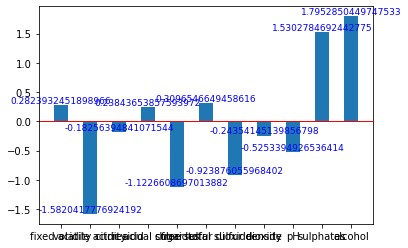

In [58]:
x_range = df_red.columns[:len(df_red.columns)-1]
y_ = [y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10]]
plt.axhline(y=0.0, color='r', linewidth=1)
plt.bar(x_range, y_, width = 0.5)
for i, v in enumerate(x_range):
    plt.text(v, y_[i], y_[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

In [59]:
x_data1.corr()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,NaN,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,NaN,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,NaN,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,NaN,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,NaN,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,NaN,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,NaN,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,NaN,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633


/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


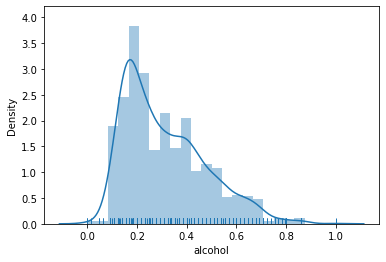

In [60]:
import seaborn as sns
data = df_red['alcohol']
sns.distplot(data, kde=True, rug=True)
plt.show()

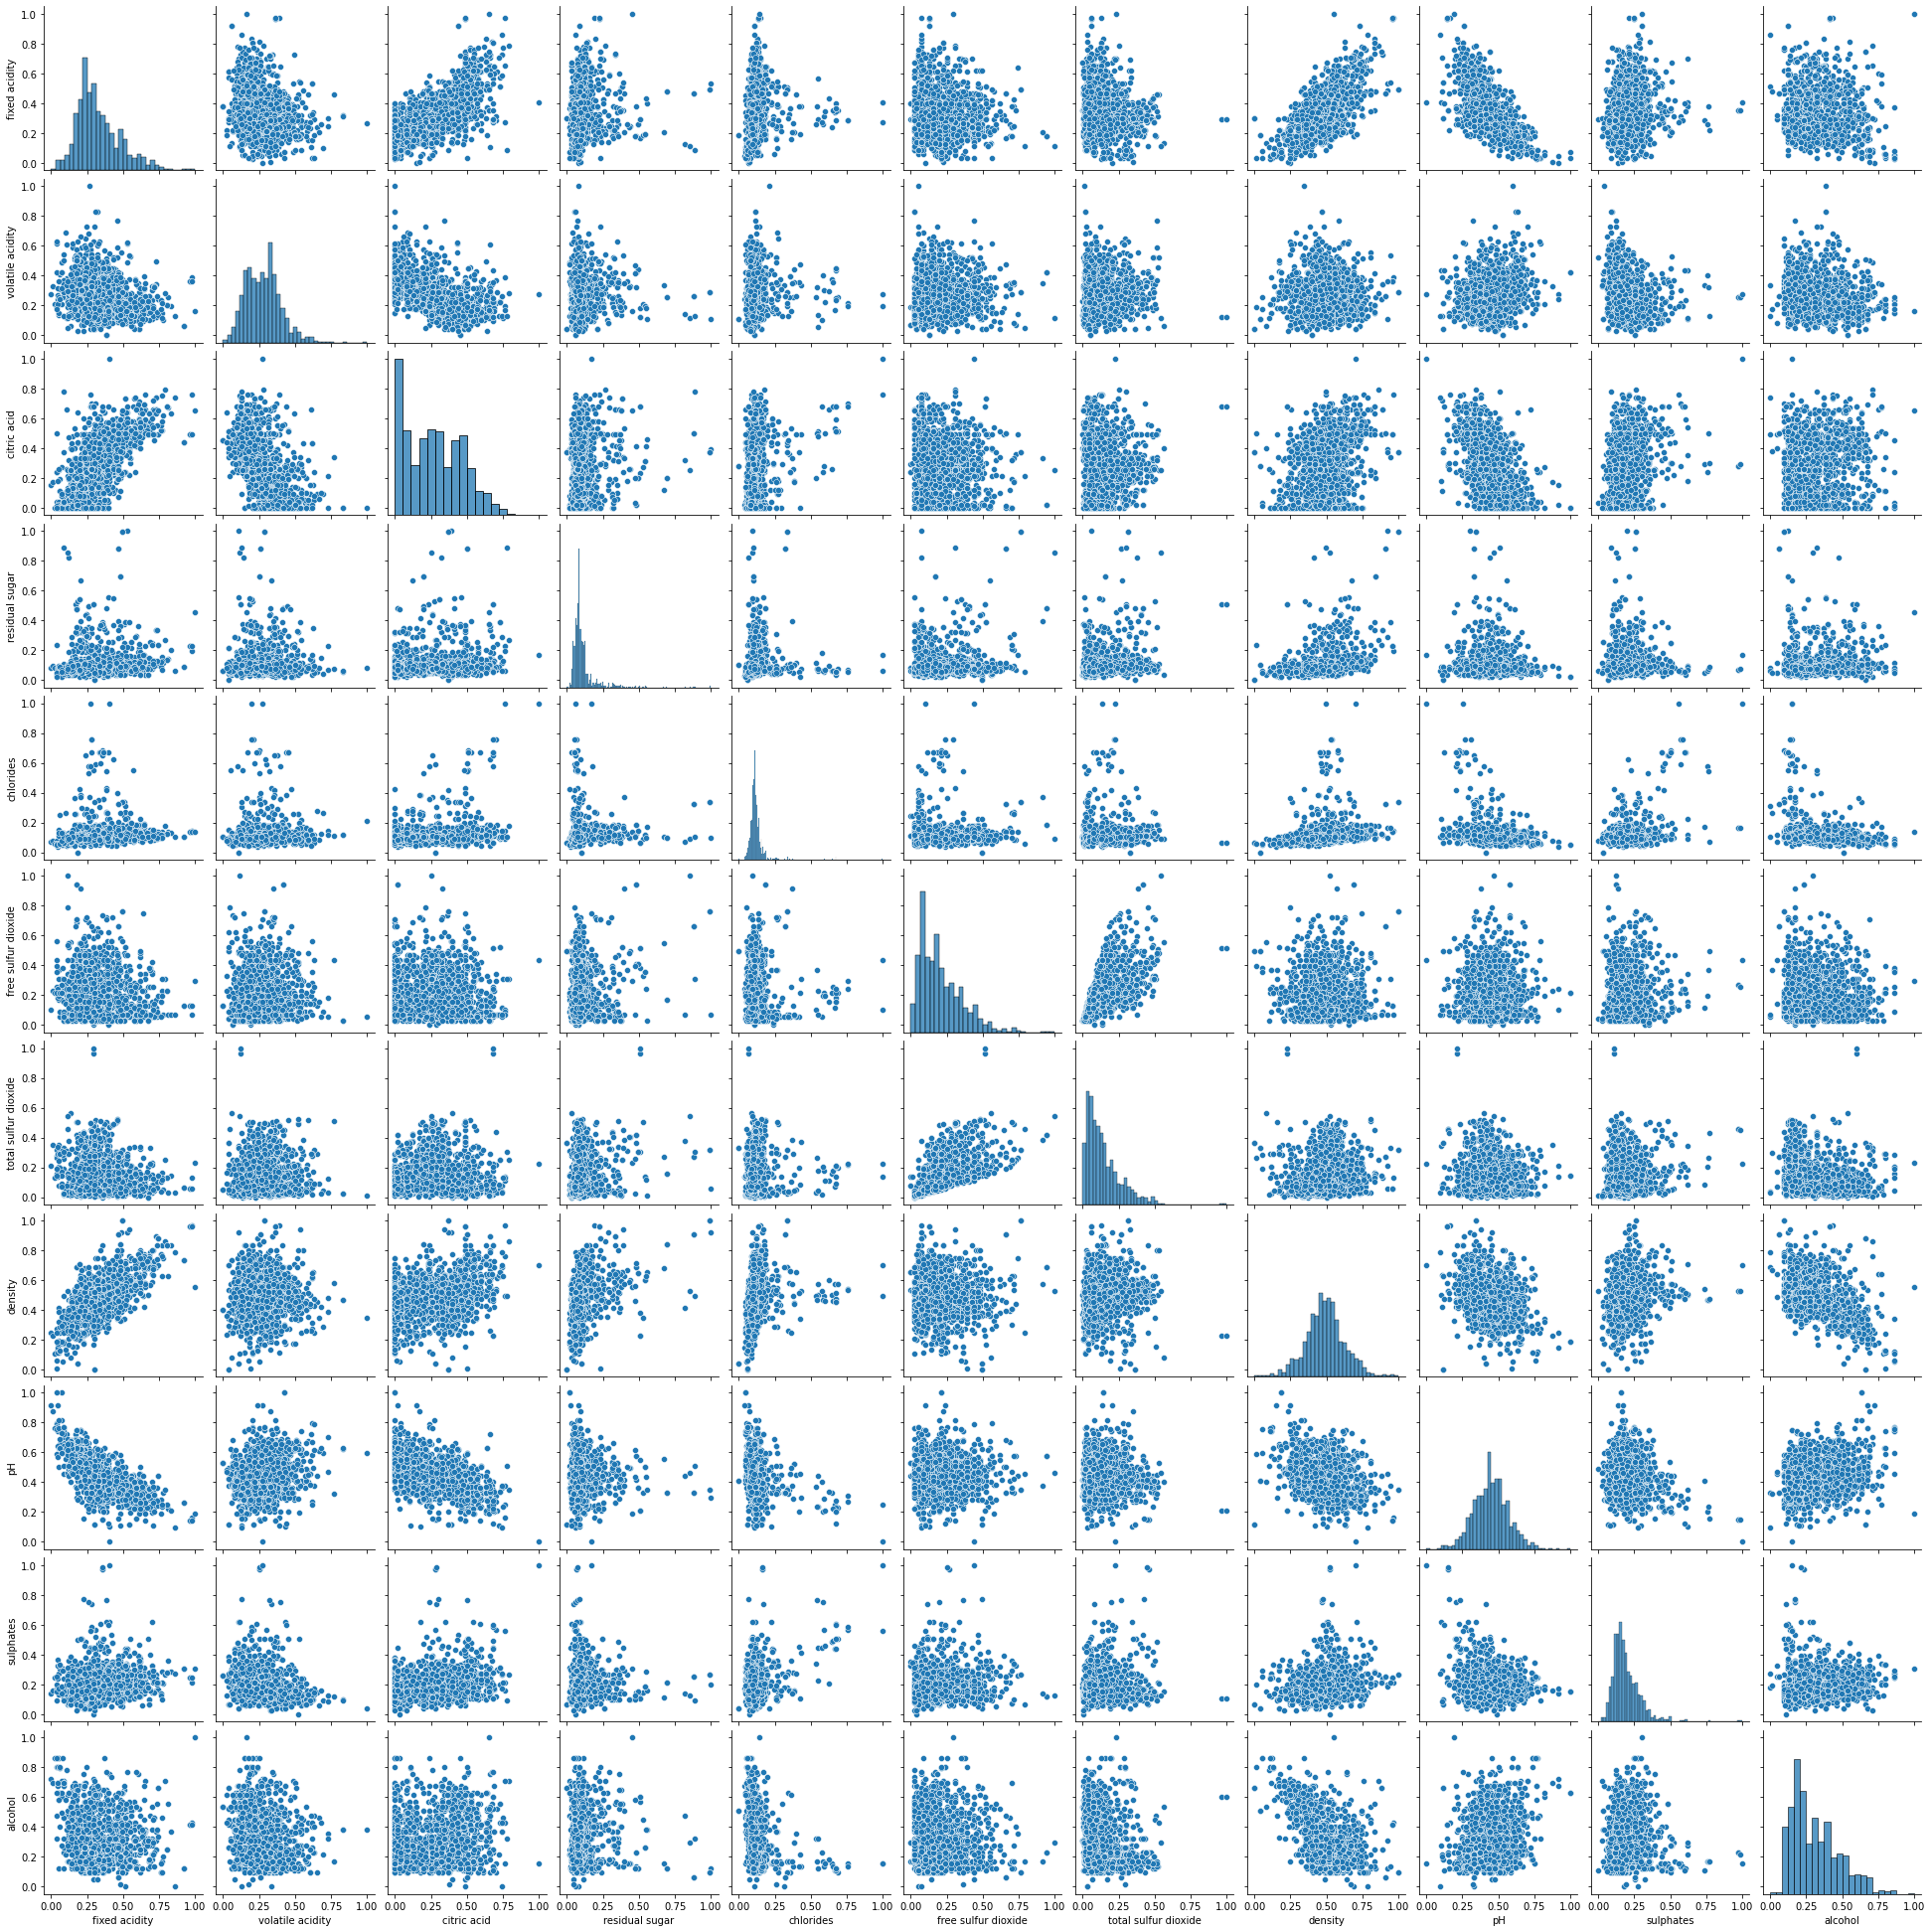

In [61]:
sns.pairplot(df_red.iloc[:,:11])
plt.show()

In [63]:
import numpy as np
import statsmodels.api as sm
x_data = df_red[['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
target = df_red[['quality']]

# for b0, 상수항 추가
x_data2 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data2)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     99.22
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          4.56e-147
Time:                        18:36:37   Log-Likelihood:                -1570.1
No. Observations:                1599   AIC:                             3160.
Df Residuals:                    1589   BIC:                             3214.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7237      0.141     40.625      0.000       5.447       6.000
volatile acidity        -1.4787      0.147    -10.035      0.000      -1.768      -1.190
residual sugar           0.1680      0.197      0.855      0.393      -0.218       0.553
chlorides               -1.2274      0.239     -5.133      0.000      -1.696      -0.758
free sulfur dioxide      0.3461      0.152      2.279      0.023       0.048       0.644
total sulfur dioxide    -1.0099      0.196     -5.143      0.000      -1.395      -0.625
density                 -0.1031      0.162     -0.638      0.524      -0.420       0.214
pH                      -0.6248      0.154     -4.063      0.000      -0.926      -0.323
sulphates                1.5071      0.189      7.989      0.000       1.137       1.877
alcohol                  1.8265      0.131     13.912      0.000       1.569       2.084
==============================================================================
Omnibus:                       25.567   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.379
Skew:                          -0.164   Prob(JB):                     7.64e-09
Kurtosis:                       3.673   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import numpy as np
import statsmodels.api as sm
x_data = df_red[['volatile acidity','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']]
target = df_red[['quality']]

# for b0, 상수항 추가
x_data3 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data3)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()


/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          5.32e-149
Time:                        18:12:53   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6675      0.094     60.274      0.000       5.483       5.852
volatile acidity        -1.4786      0.147    -10.043      0.000      -1.767      -1.190
chlorides               -1.2087      0.238     -5.076      0.000      -1.676      -0.742
free sulfur dioxide      0.3605      0.151      2.389      0.017       0.064       0.657
total sulfur dioxide    -0.9855      0.194     -5.070      0.000      -1.367      -0.604
pH                      -0.6130      0.149     -4.106      0.000      -0.906      -0.320
sulphates                1.4741      0.184      8.031      0.000       1.114       1.834
alcohol                  1.8805      0.109     17.225      0.000       1.666       2.095
==============================================================================
Omnibus:                       24.204   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                          -0.156   Prob(JB):                     2.22e-08
Kurtosis:                       3.657   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

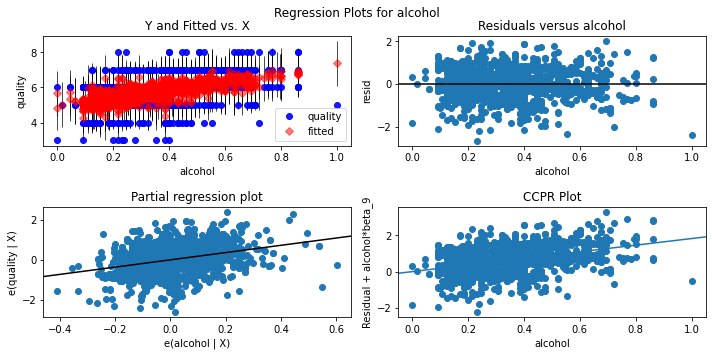

In [64]:
fig = sm.graphics.plot_regress_exog(fitted_multi_model, "alcohol", fig=plt.figure(figsize=(10, 5)))
plt.show()

In [65]:
sqrt_mse = np.sqrt(fitted_multi_model.mse_resid) ## square root of mse
std_res = fitted_multi_model.resid/sqrt_mse ## studentized residual
predicted_val = fitted_multi_model.predict(x_data3)
fig = plt.scatter(predicted_val,std_res)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()
## 잔차도 x축 Lot_size
'''
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
font_size = 15
plt.scatter(df_red['quality'],std_res)
plt.xlabel('quality', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()
'''


ValueError: shapes (1599,8) and (10,) not aligned: 8 (dim 1) != 10 (dim 0)

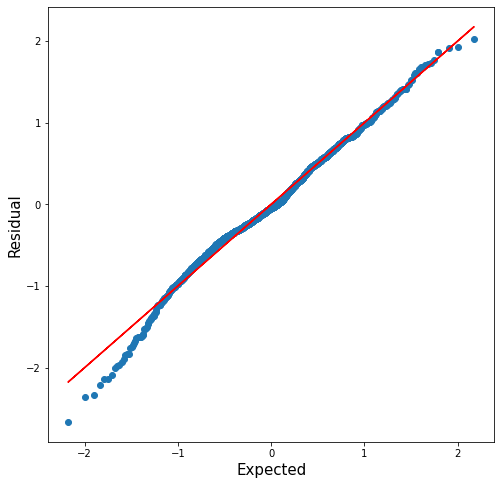

In [66]:
## qq plot
from scipy.stats import norm
sqrt_mse = np.sqrt(fitted_multi_model.mse_resid) ## square root of mse
 
num_const = 0.375 ## 백분위 분자 수정 계수
denom_const = 0.25 ## 백분위 분모 수정계수

## 오름차순으로 정렬했을 때 잔차의 순위
rank = [sorted(fitted_multi_model.resid).index(x)+1 for x in fitted_multi_model.resid] ## 인덱스가 0부터 시작하므로 1을 더한다.
 
expected_value = [] ## 이론적 잔차값
for i in range(len(fitted_multi_model.resid)):
    p = (rank[i]-num_const)/(len(fitted_multi_model.resid)+denom_const) ## 백분위
    expected_value.append(sqrt_mse*norm.ppf(p))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
 
plt.scatter(expected_value,fitted_multi_model.resid) ## 잔차도 출력
plt.plot(expected_value,expected_value,color='red')
plt.xlabel('Expected', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()

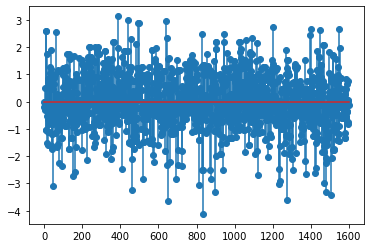

In [67]:
plt.stem(std_res)
plt.show()


In [68]:
import statsmodels
statsmodels.stats.stattools.durbin_watson(std_res, axis=0)

1.7515568385516838